In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q1)Season-wise Purple Cap holders

In [135]:
match=pd.read_csv("matches.csv")
delivery=pd.read_csv("deliveries.csv")

In [140]:
purple_cap=delivery.merge(match,left_on='match_id',right_on='id')
purple_cap.groupby(['season','bowler'])['player_dismissed'].agg('count').reset_index().sort_values('player_dismissed',ascending=False).drop_duplicates('season',keep='first').set_index('season').sort_values('season',ascending=False)

,bowler,player_dismissed
season,,
2017,B Kumar,28
2016,B Kumar,24
2015,DJ Bravo,28
2014,MM Sharma,26
2013,DJ Bravo,34
2012,M Morkel,30
2011,SL Malinga,30
2010,PP Ojha,22
2009,RP Singh,26


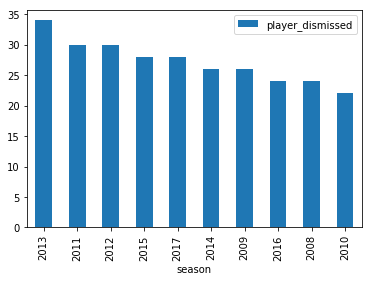

In [142]:
purple_cap.groupby(['season','bowler'])['player_dismissed'].agg('count').reset_index().sort_values('player_dismissed',ascending=False).drop_duplicates('season',keep='first').set_index('season').plot(kind='bar')


# Q2)Heatmap to show team vs over analysis on wickets taken per over

In [8]:
team_vs_over=delivery.pivot_table(values='player_dismissed',index='bowling_team',columns='over',aggfunc='count')
team_vs_over

over,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
bowling_team,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,24,28,40,31,39,39,27,24,32,32,36,33,37,36,47,42,53,61,76,83
Deccan Chargers,20,20,23,22,16,18,17,13,15,16,21,19,22,18,20,29,38,26,25,48
Delhi Daredevils,27,38,29,38,36,37,36,27,35,32,42,27,28,37,47,44,49,60,77,86
Gujarat Lions,7,9,6,15,8,4,2,4,5,9,3,7,4,12,5,6,6,5,11,23
Kings XI Punjab,31,35,41,24,40,32,31,38,31,40,33,38,38,45,36,41,51,71,60,78
Kochi Tuskers Kerala,1,3,6,4,2,6,2,2,3,3,3,2,1,5,7,4,4,4,5,7
Kolkata Knight Riders,24,30,36,33,40,42,26,37,43,28,40,38,42,39,44,46,47,73,60,90
Mumbai Indians,34,44,35,38,43,42,36,30,34,42,43,41,44,46,51,65,50,78,73,80
Pune Warriors,10,8,13,6,12,8,8,10,9,12,6,12,11,10,12,20,13,15,20,23


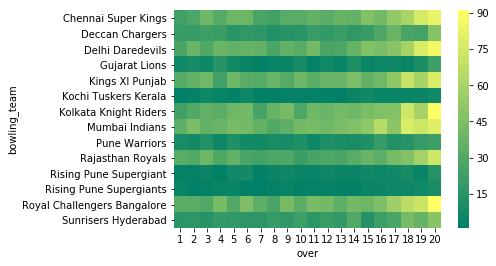

In [9]:
sns.heatmap(team_vs_over,cmap='summer')

# Q3)Best batsman in death overs(17-20) in terms of Strike rate(Runs/100 balls)( Criteria: Has played a min of 50 balls in total)


In [119]:
#procedure 1
mask1=delivery["over"]>16
deathover=delivery[mask1]
balls=deathover.groupby('batsman')['ball'].agg('count').reset_index()
mask2=balls['ball']>49
min50ball=balls[mask2]
runs=deathover.groupby('batsman')['batsman_runs'].agg('sum').reset_index()
min50ball.insert(2,column='runs',value=runs['batsman_runs'])
min50ball.insert(3,column='strick_rate',value=(runs['batsman_runs']/min50ball['ball'])*100)
min50ball.sort_values('strick_rate',ascending=False).set_index('batsman').head(1)

,ball,runs,strick_rate
batsman,,,
AB de Villiers,409,905,221.271394


In [110]:
#procedure 2 only name,ball,and Strick Rate
mask1=delivery["over"]>16
deathover=delivery[mask1]
balls=deathover.groupby('batsman').agg('count')['ball'].reset_index()
mask2=balls['ball']>49
min50ball=balls[mask2]
runs=deathover.groupby('batsman')['batsman_runs'].agg('sum').reset_index()
min50ball.insert(2,column='Strick_Rate',value=(runs['batsman_runs']/min50ball['ball'])*100)
min50ball.sort_values('Strick_Rate',ascending=False).set_index('batsman').head(1)[]


,ball,Strick_Rate
batsman,,
AB de Villiers,409,221.271394


# Q4)Create a function in which if you pass the name of a batsman it should return the name of the bowler who has dismissed him maximum times( eg if you pass V Kohli the answer should be SL Malinga-----6(times))

In [114]:
def maxdissmissed(x):
    mask=delivery['player_dismissed']==x
    player=delivery[mask]
    player=player.groupby('bowler').agg('count')['player_dismissed'].reset_index().sort_values('player_dismissed',ascending=False).head(1)
    print('Batsman ',x,' Dismissed',' by ',player.iloc[0][0],'---',player.iloc[0][1],'(times)')
maxdissmissed(input('Enter Player Name:'))

Enter Player Name:DA Warner
Batsman  DA Warner  Dismissed  by  P Kumar --- 3 (times)


# Q5)Find the name of the umpire who has attended most number of matches

In [118]:
u1=match['umpire1'].append(match['umpire2']).value_counts().reset_index().head(1)
u1.rename({'index':'Umpire',0:'Matches'},axis=1)

,Umpire,Matches
0,HDPK Dharmasena,87


# Q6)Generate a heatmap between top 20 batsman vs top 20 bowlers in terms of runs scored by the batsman

In [137]:
top20bat=delivery.groupby(['batsman']).sum()['total_runs'].reset_index().sort_values('total_runs',ascending=False).head(20)
mask=delivery['dismissal_kind']!='run_out'
top20ball=delivery[mask].groupby('bowler').agg('count')['player_dismissed'].reset_index().sort_values('player_dismissed',ascending=False).head(20)

x=delivery.set_index('bowler').loc[top20ball['bowler']].reset_index().set_index('batsman').loc[top20bat['batsman']]
x=x.pivot_table(values='total_runs',index='batsman',columns='bowler',aggfunc='sum')
x

bowler,A Mishra,A Nehra,B Kumar,DJ Bravo,DW Steyn,Harbhajan Singh,IK Pathan,JA Morkel,MM Sharma,P Kumar,PP Chawla,PP Ojha,R Ashwin,R Vinay Kumar,RP Singh,SL Malinga,SP Narine,SR Watson,UT Yadav,Z Khan
batsman,,,,,,,,,,,,,,,,,,,,
AB de Villiers,13.0,62.0,51.0,78.0,56.0,85.0,73.0,37.0,40.0,54.0,43.0,40.0,46.0,16.0,12.0,80.0,24.0,55.0,42.0,28.0
AM Rahane,90.0,60.0,72.0,54.0,18.0,27.0,44.0,25.0,54.0,52.0,100.0,29.0,26.0,80.0,21.0,49.0,43.0,23.0,63.0,37.0
BB McCullum,26.0,32.0,32.0,13.0,16.0,76.0,53.0,66.0,6.0,45.0,32.0,9.0,29.0,81.0,33.0,88.0,36.0,38.0,55.0,92.0
CH Gayle,46.0,45.0,109.0,58.0,60.0,86.0,67.0,23.0,20.0,117.0,109.0,23.0,50.0,0.0,39.0,53.0,44.0,20.0,39.0,36.0
DA Warner,39.0,25.0,2.0,45.0,44.0,100.0,NaN,49.0,91.0,141.0,72.0,68.0,50.0,5.0,46.0,78.0,111.0,34.0,61.0,48.0
G Gambhir,55.0,29.0,99.0,33.0,74.0,87.0,79.0,104.0,39.0,93.0,56.0,58.0,44.0,65.0,54.0,43.0,NaN,64.0,31.0,121.0
JH Kallis,35.0,32.0,9.0,48.0,26.0,52.0,57.0,68.0,6.0,5.0,41.0,93.0,42.0,28.0,52.0,85.0,NaN,34.0,51.0,101.0
KD Karthik,60.0,47.0,28.0,28.0,15.0,9.0,48.0,15.0,77.0,26.0,56.0,46.0,43.0,61.0,25.0,18.0,40.0,27.0,60.0,20.0
M Vijay,11.0,29.0,36.0,6.0,23.0,50.0,35.0,10.0,8.0,86.0,33.0,36.0,35.0,52.0,63.0,43.0,17.0,64.0,73.0,35.0


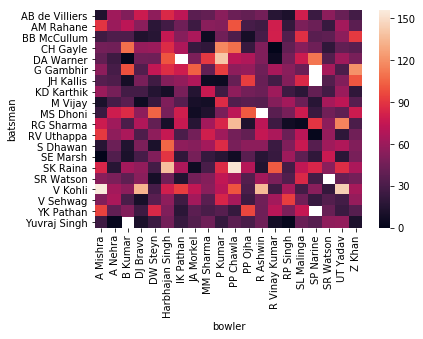

In [138]:
sns.heatmap(x)


## Q7)Fetch the name of top 10 bowlers who have the best economy(Runs/over) in the death overs(17-20)[Note: the bowler should have bowled a minimum of 10 overs]

In [123]:
mask1=delivery["over"]>16
deathover=delivery[mask1]
balls=deathover.groupby('bowler')['ball'].agg('count').reset_index()
mask2=balls['ball']>59
min10over=balls[mask2]
runs=delivery.groupby('bowler')['total_runs'].agg('sum').reset_index()
x=min10over.merge(runs,on='bowler')
x.insert(3,column='Economy',value=(x['total_runs']/x['ball'])*6)
x.sort_values('Economy').head(10).set_index('bowler')

,ball,total_runs,Economy
bowler,,,
Sohail Tanvir,98,275,16.836735
KK Cooper,256,789,18.492188
Mustafizur Rahman,149,461,18.563758
J Theron,95,311,19.642105
DE Bollinger,216,716,19.888889
SL Malinga,891,3034,20.430976
CH Morris,369,1307,21.252033
JJ Bumrah,396,1433,21.712121
MA Starc,198,725,21.969697


# Q8)Fetch the name of top 10 fielders ie in terms of catches(Criteria: Should not be a wicketkeeper)

In [128]:
mask=delivery['dismissal_kind']=='caught'
catches=delivery[mask]
catches.groupby('fielder').agg('count')['dismissal_kind'].reset_index().sort_values('dismissal_kind',ascending=False).rename({'dismissal_kind':'NO of Catches'},axis=1).head(10).set_index('fielder')

,NO of Catches
fielder,
KD Karthik,88
SK Raina,83
AB de Villiers,81
MS Dhoni,76
RV Uthappa,75
RG Sharma,70
NV Ojha,65
KA Pollard,64
V Kohli,60


# Q9)Create a function by the name of team_performance, which will accept a valid ipl team name as a parameter and will return 2 strings, one of the team against which the team has won most matches and 2nd against which the team has lost most matches

In [129]:
def team_perform(x):
#most win
    mask=match['winner']==x
    mostwin=match[mask]
    t1=mostwin['team1'].append(mostwin['team2'])
    t1=t1.value_counts().drop(x).head(1).reset_index()['index'].tolist()[0]
#most lost
    mask2=match['winner']!=x
    mostlose=match[mask2]
    m3=mostlose['team1']==x #Here team2 has no x team name
    m3=mostlose[m3]
    m4=mostlose['team2']==x #here team1 has no x team name
    m4=mostlose[m4]
    m3=m3['team2'].append(m4['team1'])
    m3=m3.value_counts().head(1).reset_index()['index'].tolist()[0]
    team=[t1,m3]
    return team
team=team_perform(input("Enter Team name:"))
print('Most Win against: ',team[0],'\n','Most Lost Against: ',team[1])

Enter Team name:Kolkata Knight Riders
Most Win against:  Kings XI Punjab 
 Most Lost Against:  Mumbai Indians


# Q10)Team wise record that is matches played and matches won

In [143]:
winner=match.groupby('winner').agg('count')['result'].reset_index().rename({'winner':'Team','result':'Winner'},axis=1)
played=match['team1'].append(match['team2']).value_counts().reset_index().rename({'index':'Team',0:'Played'},axis=1)
playvswin=played.merge(winner,on='Team').reset_index().drop('index',axis=1).set_index('Team')
playvswin

,Played,Winner
Team,,
Mumbai Indians,157,92
Royal Challengers Bangalore,152,73
Kolkata Knight Riders,148,77
Kings XI Punjab,148,70
Delhi Daredevils,147,62
Chennai Super Kings,131,79
Rajasthan Royals,118,63
Sunrisers Hyderabad,76,42
Deccan Chargers,75,29
